#Task 1

Example:
X = [-0.58783609 -0.56213275 -0.53587454 -0.50908739 -0.48179773 -0.45403249
 -0.42581909 -0.39718538 -0.36815961 -0.33877044]
y = [-0.30904688]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_12 (CuDNNLSTM)    (None, 16)                1216      
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 3s 382us/step - loss: 0.0277 - val_loss: 0.0073
Epoch 2/10
8990/8990 [==============================] - 3s 284us/step - loss: 0.0037 - val_los

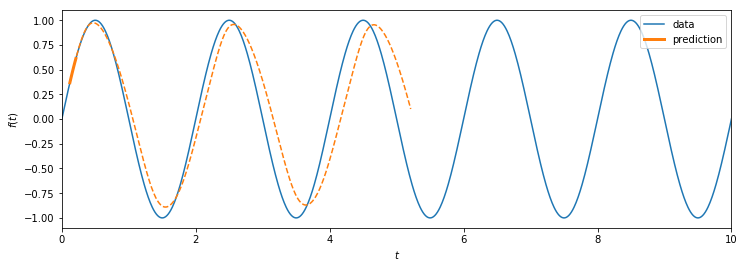

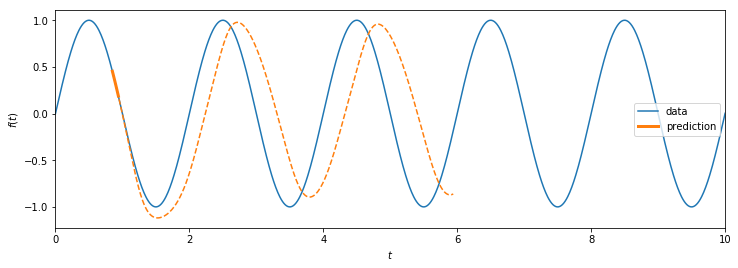

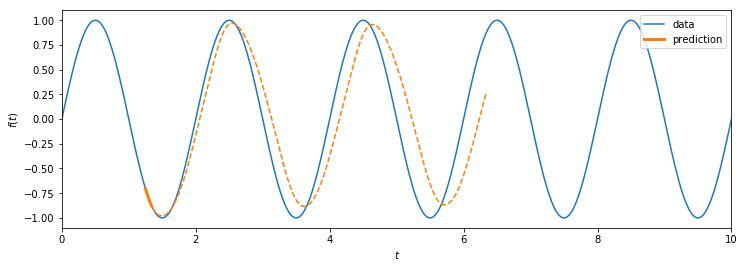

In [11]:
from __future__ import print_function
# import dlipr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(16)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


we can see lack of an appropriate epochs of training lead to a bit difference in results. Let change epochs and repeat training again...

Example:
X = [-0.45179155 -0.42354349 -0.39487736 -0.36582147 -0.33640447 -0.30665542
 -0.27660368 -0.24627891 -0.21571104 -0.18493025]
y = [-0.15396692]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_17 (CuDNNLSTM)    (None, 16)                1216      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/100
8990/8990 [==============================] - 4s 443us/step - loss: 0.0298 - val_loss: 0.0086
Epoch 2/100
8990/8990 [==============================] - 3s 280us/step - loss: 0.0040 - val_l

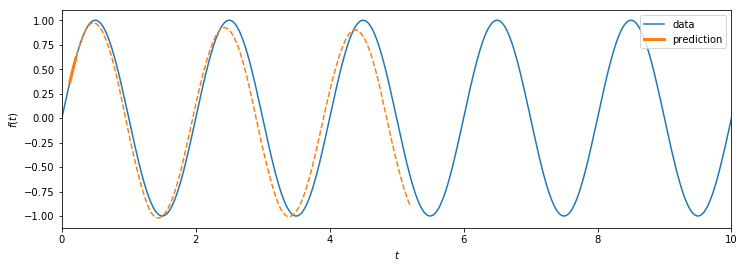

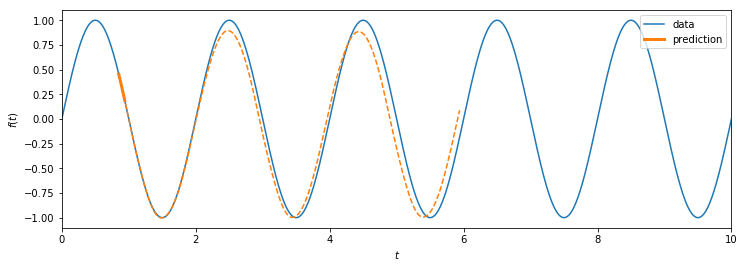

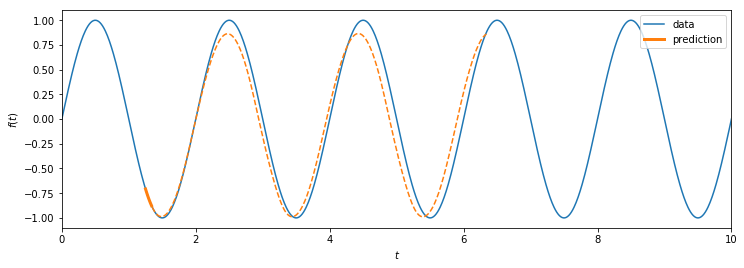

In [16]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(16)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=100,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


let's try the model!

##LSTM change

let's change the size of LSTM

Example:
X = [0.39891474 0.42752403 0.45571132 0.48344879 0.51070906 0.53746521
 0.56369085 0.58936009 0.61444758 0.63892856]
y = [0.66277887]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_15 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_19 (CuDNNLSTM)    (None, 8)                 352       
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 9         
Total params: 361
Trainable params: 361
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 4s 463us/step - loss: 0.0687 - val_loss: 0.0126
Epoch 2/10
8990/8990 [==============================] - 3s 289us/step - loss: 0.0097 - val_loss: 0.0070
Epoch

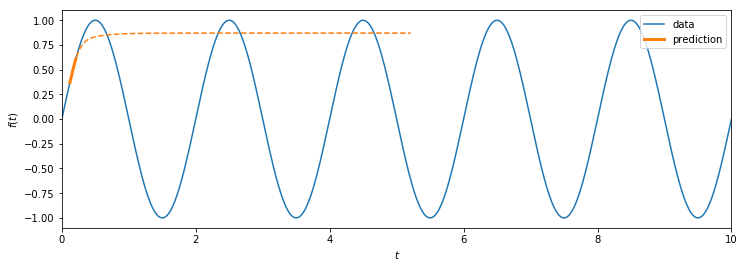

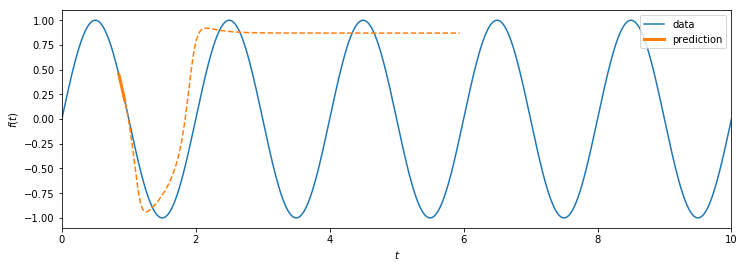

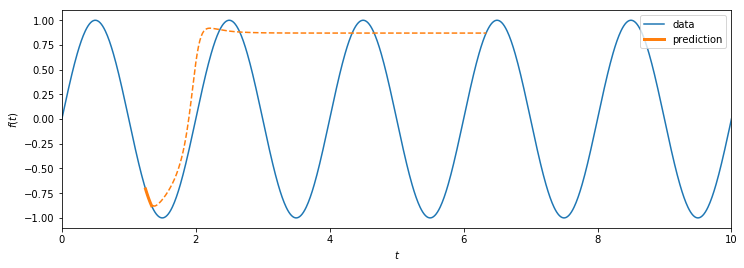

In [18]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(8)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


So, small size can lead to forgetting the patttern! It means the network cannot model the sequence very well.

Let's increase the size.

Example:
X = [-0.86143375 -0.84505443 -0.82784097 -0.80981037 -0.79098042 -0.77136971
 -0.75099761 -0.72988421 -0.70805036 -0.68551761]
y = [-0.6623082]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_16 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_20 (CuDNNLSTM)    (None, 32)                4480      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 33        
Total params: 4,513
Trainable params: 4,513
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 4s 466us/step - loss: 0.0232 - val_loss: 0.0057
Epoch 2/10
8990/8990 [==============================] - 3s 285us/step - loss: 0.0014 - val_loss

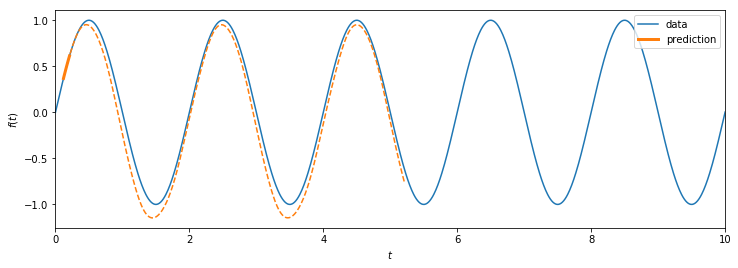

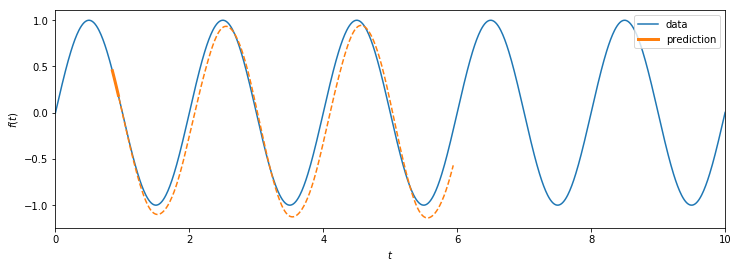

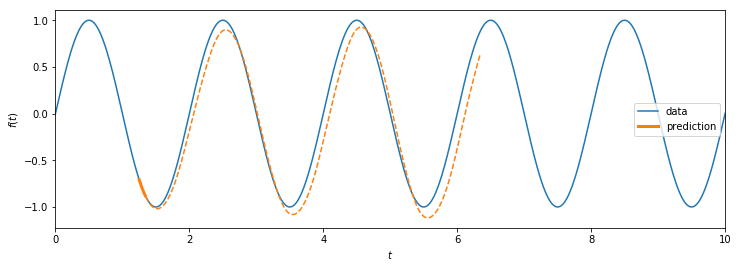

In [19]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(32)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


increasing the size lead to appropriate forcasting. 

what is we change number of LSTM layers for the worse size of previous experience?

Example:
X = [-0.64878482 -0.67236971 -0.69529093 -0.71752584 -0.73905249 -0.75984965
 -0.77989677 -0.79917408 -0.81766254 -0.83534391]
y = [-0.85220072]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_33 (CuDNNLSTM)    (None, None, 8)           352       
_________________________________________________________________
cu_dnnlstm_34 (CuDNNLSTM)    (None, 2)                 96        
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 3         
Total params: 451
Trainable params: 451
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 7s 733us/step 

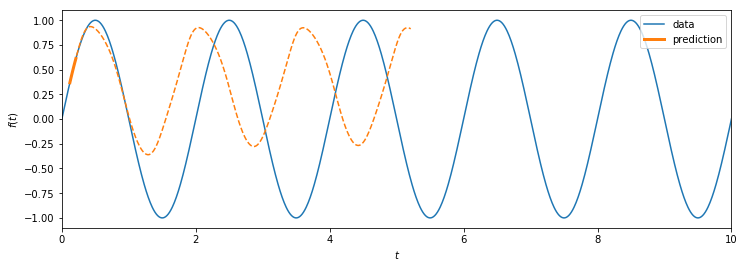

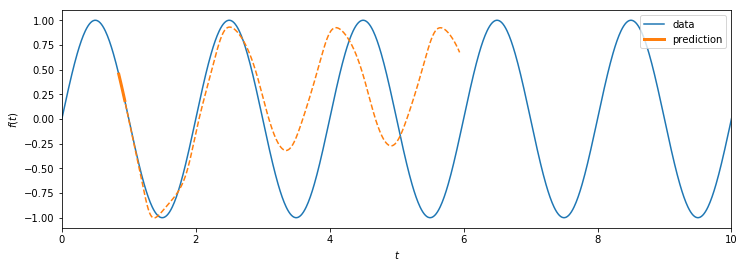

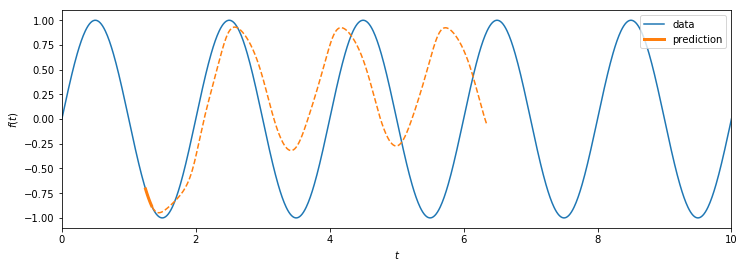

In [26]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(8, return_sequences=True)(z0)
z = CuDNNLSTM(2)(z)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


It works better than befor but not great. consider that we limit number of epochs and size of LSTM layer to see the progress of forcasing.


let's change the size and number of LSTM layers.

Example:
X = [-0.06216964 -0.03078582  0.00062838  0.03204196  0.06342392  0.09474327
  0.1259691   0.15707059  0.18801704  0.21877791]
y = [0.24932282]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_24 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_35 (CuDNNLSTM)    (None, None, 8)           352       
_________________________________________________________________
cu_dnnlstm_36 (CuDNNLSTM)    (None, 4)                 224       
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 5         
Total params: 581
Trainable params: 581
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 7s 750us/step -

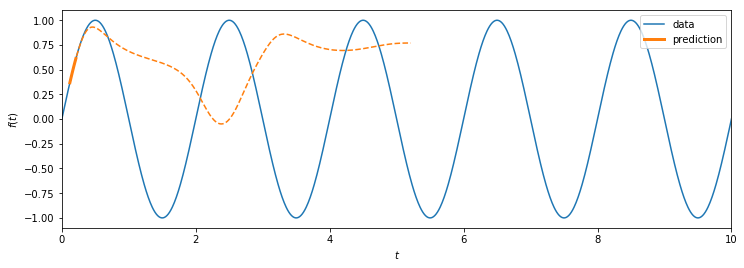

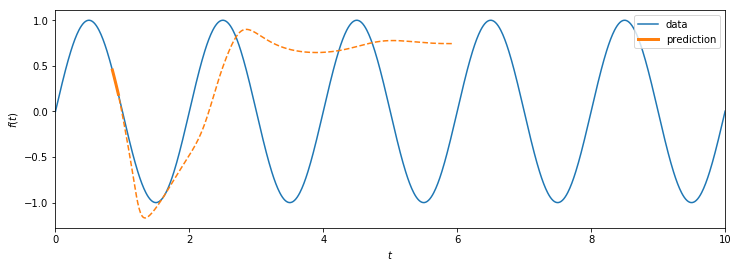

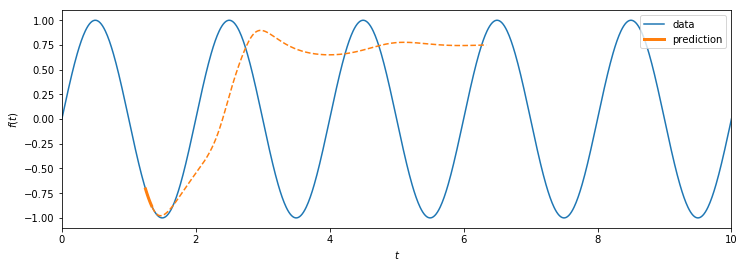

In [27]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(8, return_sequences=True)(z0)
z = CuDNNLSTM(4)(z)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


It seems the model want to chage the amplitude of his prediction to match with desire.

what if we change size of second LSTM layer to see the result?

Example:
X = [ 0.15551895  0.12441051  0.09317927  0.06185605  0.03047178 -0.00094257
 -0.03235599 -0.06373747 -0.09505604 -0.12628078]
y = [-0.15738088]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_25 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_37 (CuDNNLSTM)    (None, None, 8)           352       
_________________________________________________________________
cu_dnnlstm_38 (CuDNNLSTM)    (None, 8)                 576       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 9         
Total params: 937
Trainable params: 937
Non-trainable params: 0
_________________________________________________________________
None
Train on 8990 samples, validate on 999 samples
Epoch 1/10
8990/8990 [==============================] - 7s 764us/step 

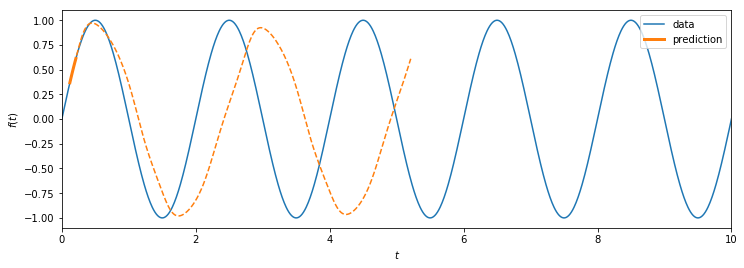

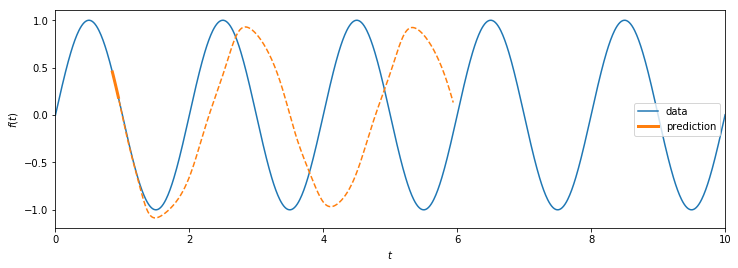

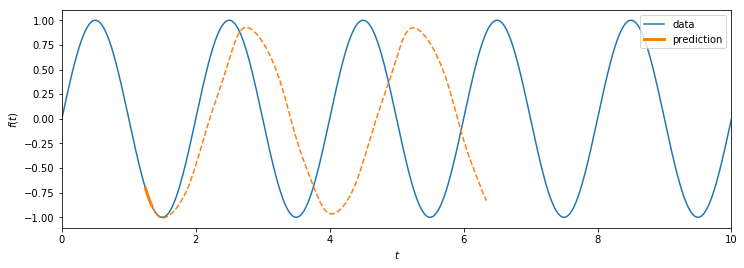

In [28]:
# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 10
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(8, return_sequences=True)(z0)
z = CuDNNLSTM(8)(z)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


It goes well.

## window change

window size are a major problem in signal processing. In one hand, stationary analysis needs to limit the size of window and being continous (as a result of being time series) want to increase the size and avoid the limitation of size.

let's increase the size of window.

Example:
X = [ 0.13624785  0.10505965  0.07376774  0.04240303  0.01099645 -0.02042097
 -0.05181825 -0.08316437 -0.1144284  -0.14557948 -0.17658687 -0.20741994
 -0.23804828 -0.26844165 -0.29857005 -0.32840373 -0.35791326 -0.38706949
 -0.41584366 -0.44420736]
y = [-0.4721326]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_29 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_42 (CuDNNLSTM)    (None, 16)                1216      
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 8981 samples, validate on 998 samples
Epoch 1/10
8981/8981 [==============================] - 6s 645us/step - loss:

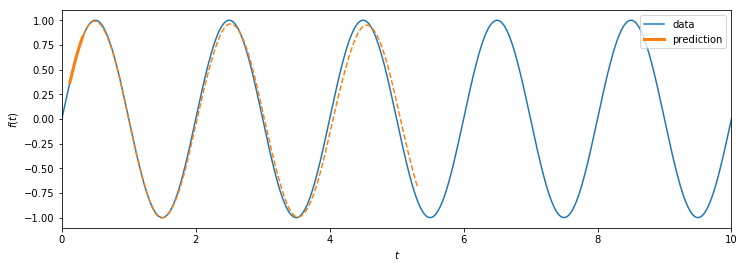

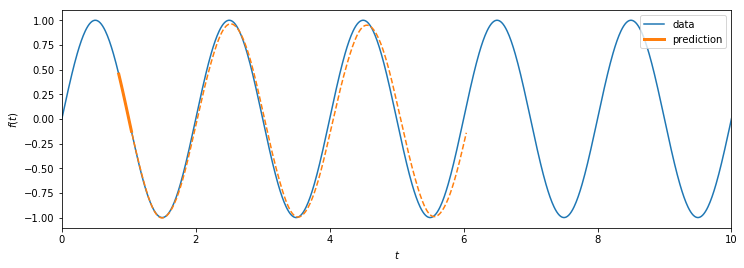

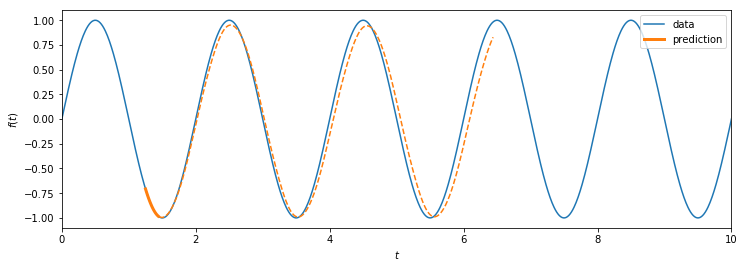

In [32]:
from __future__ import print_function
# import dlipr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 20
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(16)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


it is obvious if increase the size of window, it will have more seqence pattern in one window therefore, its accuracy will be increased.

what abour small size of window?

Example:
X = [0.73926411 0.76005387 0.78009339 0.7993629  0.81784338]
y = [0.83551659]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_43 (CuDNNLSTM)    (None, 16)                1216      
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 8994 samples, validate on 1000 samples
Epoch 1/10
8994/8994 [==============================] - 5s 560us/step - loss: 0.0468 - val_loss: 0.0050
Epoch 2/10
8994/8994 [==============================] - 2s 242us/step - loss: 0.0047 - val_loss: 0.0045
Epoch 3/10
8994/8994 [==============================] - 

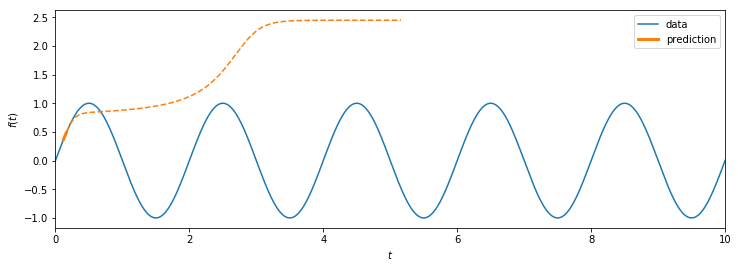

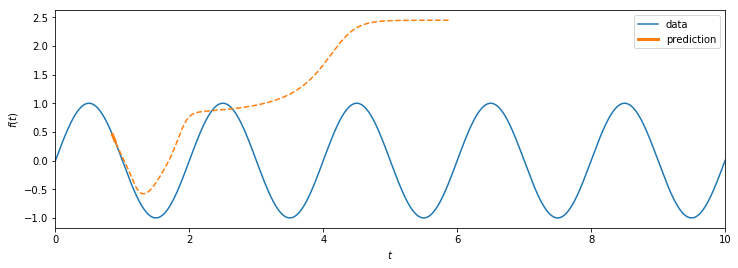

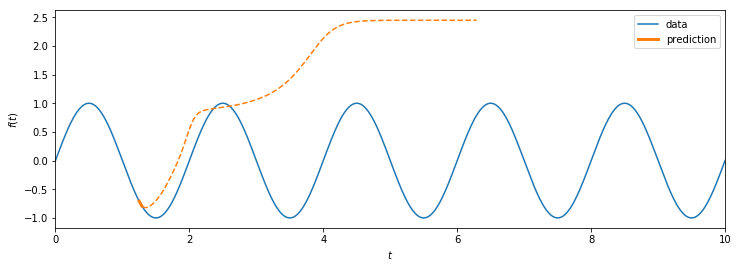

In [33]:
from __future__ import print_function
# import dlipr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 5
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(16)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


less sample lead to less acuracy.

the minimum size of windows can be only 1 sample. let's try it.

Example:
X = [0.40323193]
y = [0.37428613]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_31 (InputLayer)        (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_44 (CuDNNLSTM)    (None, 16)                1216      
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 17        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________
None
Train on 8998 samples, validate on 1000 samples
Epoch 1/10
8998/8998 [==============================] - 5s 535us/step - loss: 0.1766 - val_loss: 0.0028
Epoch 2/10
8998/8998 [==============================] - 2s 221us/step - loss: 0.0010 - val_loss: 7.8601e-04
Epoch 3/10
8998/8998 [==============================] - 2s 223us/step - loss: 7.5144e-04 - val_l

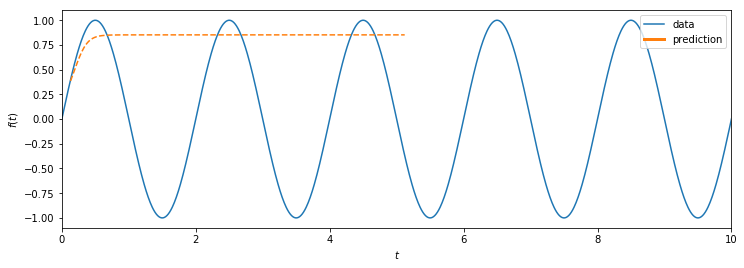

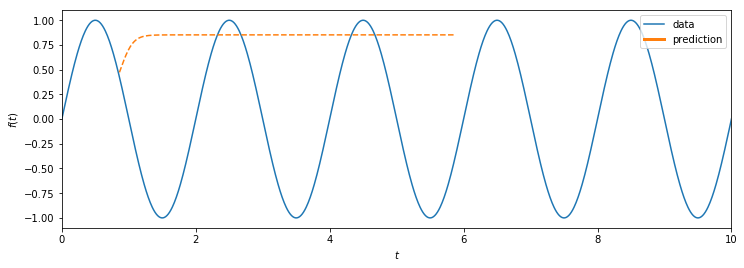

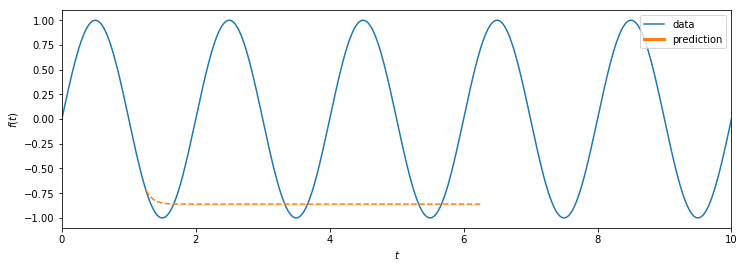

In [34]:
from __future__ import print_function
# import dlipr
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.layers import Input, CuDNNLSTM, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


# -----------------------------------------------
# Data
# -----------------------------------------------
# create a signal trace: t = 0-100, f = sin(pi * t)
N = 10000
t = np.linspace(0, 100, N)  # time steps
f = np.sin(np.pi * t)  # signal

# split into semi-redundant sub-sequences of length = window_size + 1
window_size = 1
n = N - window_size - 1  # number of possible splits
data = np.stack([f[i: i + window_size + 1] for i in range(n)])

# shuffle the order of the sub-sequences
np.random.shuffle(data)

# split into features (first <window_size> steps) and targets (last step)
X, y = np.split(data, [-1], axis=1)
X = X[..., np.newaxis]

print('Example:')
print('X =', X[0, :, 0])
print('y =', y[0, :])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=[None, 1])
z = CuDNNLSTM(16)(z0)
z = Dense(1)(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(loss='mse', optimizer='adam')

model.fit(X, y,
          epochs=10,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=7, verbose=1, min_lr=1E-5),
              EarlyStopping(patience=4, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
def predict_next_k(model, window, k=10):
    """Predict next k steps for the given model and starting sequence """
    x = window[np.newaxis, :, np.newaxis]  # initial input
    y = np.zeros(k)
    for i in range(k):
        y[i] = model.predict(x, verbose=2)
        # create the new input including the last prediction
        x = np.roll(x, -1, axis=1)  # shift all inputs 1 step to the left
        x[:, -1] = y[i]  # add latest prediction to end
    return y


def plot_prediction(i0=0, k=500, fname=None):
    """ Predict and plot the next k steps for an input starting at i0 """
    y0 = f[i0: i0 + window_size]  # starting window (input)
    y1 = predict_next_k(model, y0, k)  # predict next k steps

    t0 = t[i0: i0 + window_size]
    t1 = t[i0 + window_size: i0 + window_size + k]

    plt.figure(figsize=(12, 4))
    plt.plot(t, f, label='data')
    plt.plot(t0, y0, color='C1', lw=3, label='prediction')
    plt.plot(t1, y1, color='C1', ls='--')
    plt.xlim(0, 10)
    plt.legend()
    plt.xlabel('$t$')
    plt.ylabel('$f(t)$')
    if fname is not None:
        plt.savefig(fname, bbox_inches='tight')


plot_prediction(i0 = 12, k = 500, fname='sinus-1.png')
plot_prediction(i0 = 85, k = 500, fname='sinus-2.png')
plot_prediction(i0 = 125, k = 500, fname='sinus-3.png')


if the model does not see the sequence, it can not predict based on the sequence. so we can see DC in zero frequency!

#Task 2

In [4]:
from __future__ import print_function
# import dlipr
import numpy as np
from scipy.signal import fftconvolve
from keras.models import Model
from keras.layers import Input, LSTM, Dense, TimeDistributed, CuDNNLSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


def make_data(N, length=20, pattern=[1, 0, 1, 0]):
    """ Create dataset (X, Y) with
    X (array, shape=[N, length, 1]): random bit streams
    Y (array, shape=[N, length, 1]): occurrences of pattern in X tagged by 1's
    """
    X = np.random.randint(2, size=(N, length))
    Y = np.zeros_like(X)
    pattern = np.array(pattern)

    def search(x, pattern):
        """ Return first index of all occurrences of pattern in x """
        f = fftconvolve(x * 2 - 1, (pattern * 2 - 1)[::-1], mode='valid')
        return np.where(np.round(f - len(pattern)) == 0)[0]

    for i in range(N):
        for j in search(X[i], pattern):
            Y[i, j: j + len(pattern)] = 1

    return X[..., np.newaxis], Y[..., np.newaxis]


# -----------------------------------------------
# Data
# -----------------------------------------------
X, Y = make_data(10000, 200)

print('Example:')
print('X =', X[0, :, 0])
print('Y =', Y[0, :, 0])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------

z0 = Input(shape=[None, 1])
z = CuDNNLSTM(32, return_sequences=True)(z0)
z = CuDNNLSTM(32, return_sequences=True)(z)
z = CuDNNLSTM(32, return_sequences=True)(z)
z = TimeDistributed(Dense(1, activation='sigmoid'))(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("np.mean(Y)", np.mean(Y))
model.fit(X, Y,
          class_weight=[np.mean(Y), 1],  # target contains more 0 than 1 --> reweight
          epochs=20,
          batch_size=32,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
X, Y = make_data(100, 5000)  # Note: we're using a different sequence_length here
print(model.evaluate(X, Y, verbose=1))
Yp = model.predict(X)
X = X[0, :, 0]
Y = Y[0, :, 0]
Yp = Yp[0, :, 0]
print('\nTest example:')
print('X   Y   Yp (prob)')
for i in range(len(X)):
    print('%i   %i   %i  %.4f' % (X[i], Y[i], Yp[i], Yp[i]))


Example:
X = [1 0 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1
 1 0 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 1 0 0 1
 1 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 1 1 1 1 0
 1 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1
 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1
 0 1 0 1 1 0 1 1 1 0 0 0 0 1 1]
Y = [0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0]


W0707 12:54:03.363633 139662544934784 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, None, 1)           0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, None, 32)          4480      
_________________________________________________________________
cu_dnnlstm_3 (CuDNNLSTM)     (None, None, 32)          8448      
_________________________________________________________________
cu_dnnlstm_4 (CuDNNLSTM)     (None, None, 32)          8448      
_________________________________________________________________
time_distributed_1 (TimeDist (None, None, 1)           33        
Total params: 21,409
Trainable params: 21,409
Non-trainable params: 0
_________________________________________________________________
None
np.mean(Y) 0.216124
Train on 9000 samples, validate on 1000 samples
Epoch 1/20
9000/9000 [==============================] - 60s 7ms/s

what if we use Bidirectional LSTM?

In [42]:
from __future__ import print_function
# import dlipr
import numpy as np
from scipy.signal import fftconvolve
from keras.models import Model
from keras.layers import Input, LSTM, Dense, TimeDistributed, CuDNNLSTM, Bidirectional
from keras.callbacks import EarlyStopping, ReduceLROnPlateau


def make_data(N, length=20, pattern=[1, 0, 1, 0]):
    """ Create dataset (X, Y) with
    X (array, shape=[N, length, 1]): random bit streams
    Y (array, shape=[N, length, 1]): occurrences of pattern in X tagged by 1's
    """
    X = np.random.randint(2, size=(N, length))
    Y = np.zeros_like(X)
    pattern = np.array(pattern)

    def search(x, pattern):
        """ Return first index of all occurrences of pattern in x """
        f = fftconvolve(x * 2 - 1, (pattern * 2 - 1)[::-1], mode='valid')
        return np.where(np.round(f - len(pattern)) == 0)[0]

    for i in range(N):
        for j in search(X[i], pattern):
            Y[i, j: j + len(pattern)] = 1

    return X[..., np.newaxis], Y[..., np.newaxis]


# -----------------------------------------------
# Data
# -----------------------------------------------
X, Y = make_data(10000, 200)

print('Example:')
print('X =', X[0, :, 0])
print('Y =', Y[0, :, 0])

# -----------------------------------------------
# Model & Training
# -----------------------------------------------

z0 = Input(shape=[None, 1])
z = Bidirectional(CuDNNLSTM(32, return_sequences=True))(z0)
z = Bidirectional(CuDNNLSTM(32, return_sequences=True))(z)
z = Bidirectional(CuDNNLSTM(16, return_sequences=True))(z)
z = TimeDistributed(Dense(1, activation='relu'))(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())


model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print("np.mean(Y)", np.mean(Y))
model.fit(X, Y,
          class_weight=[np.mean(Y), 1],  # target contains more 0 than 1 --> reweight
          epochs=20,
          batch_size=256,
          verbose=1,
          validation_split=0.1,
          callbacks=[
              ReduceLROnPlateau(factor=0.67, patience=2, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
X, Y = make_data(100, 5000)  # Note: we're using a different sequence_length here
print(model.evaluate(X, Y, verbose=1))
Yp = model.predict(X)
X = X[0, :, 0]
Y = Y[0, :, 0]
Yp = Yp[0, :, 0]
print('\nTest example:')
print('X   Y   Yp (prob)')
for i in range(len(X)):
    print('%i   %i   %i  %.4f' % (X[i], Y[i], Yp[i], Yp[i]))


Example:
X = [0 1 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0
 0 0 0 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 1 1
 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 1 1 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 0 1
 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0]
Y = [0 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 0 0]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_39 (InputLayer)        (None, N

loss decay was great and as a result accuracy was improved more than 10 percent!
besides we can see Bidirectional model prune to overfitting more than simple LSTM layer.

generalization of this model for different sequence length can be happend if we consider type of data. it means if we consider trade off of length of inputs it can be helpfull. 

#Task 3

In [5]:
import numpy as np
# import dlipr
from keras.models import Model
from keras.layers import Input, Dense, CuDNNLSTM, TimeDistributed, RepeatVector
from keras.callbacks import ReduceLROnPlateau, EarlyStopping


# characters to consider
alphabet = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '+', '-', ' ']
n_chars = len(alphabet)


def onehot_encode(string):
    """ Convert string to sequence of one-hot encoded characters """
    V = np.eye(len(alphabet))
    encode = dict((c, V[i]) for i, c in enumerate(alphabet))
    return np.array([encode[c] for c in string])


def onehot_decode(sequence):
    """ Convert sequence of one-hot encoded characters to string """
    if len(sequence) == 1:
        sequence = sequence[0]
    decode = dict((i, c) for i, c in enumerate(alphabet))
    return ''.join([decode[np.argmax(v)] for v in sequence])


def make_data(N, nums=2, low=-99, high=99):
    """ Generate dataset (X, y) of sequences of one-hot encoded characters
    X (array, shape=[N, sx, n_chars]): sum of nums random numbers from low to high
    y (array, shape=[N, sy, n_chars]): result
    """
    X = np.random.randint(low=low, high=high + 1, size=(N, nums))
    y = np.sum(X, axis=1)

    # form string of each expression to strings
    X = ['+'.join(it) for it in X.astype(str)]
    y = y.astype(str)

    # calculate maximum size of strings for X and y
    sx = int(nums * np.ceil(np.log10(max(-low, high)) + 1))
    sy = int(np.ceil(np.log10(nums * max(-low, high))) + 1)

    # clean up strings ("+-" --> "-") and left-pad with spaces
    X = [it.replace('+-', '-').rjust(sx) for it in X]
    y = [it.rjust(sy) for it in y]

    # one-hot encode each character
    X = np.array([onehot_encode(i) for i in X])
    y = np.array([onehot_encode(i) for i in y])
    return X, y


# -----------------------------------------------
# Data
# -----------------------------------------------
X, y = make_data(10000, 2)
sy = len(y[0])  # length of the answer string

print('Example:')
a = onehot_decode(X[500])
b = onehot_decode(y[500])
print('%s = %s\n' % (a, b))


# -----------------------------------------------
# Model & Training
# -----------------------------------------------
z0 = Input(shape=((None, n_chars)))
z = CuDNNLSTM(128, return_sequences=True)(z0)
z = CuDNNLSTM(64)(z)
z = RepeatVector(sy)(z)
z = CuDNNLSTM(128, return_sequences=True)(z)
z = TimeDistributed(Dense(n_chars, activation='softmax'))(z)
model = Model(inputs=z0, outputs=z)
print(model.summary())

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

model.fit(X, y,
    epochs=100,
    batch_size=16,
    validation_split=0.05,
    verbose=1,
    callbacks=[
        ReduceLROnPlateau(factor=0.67, patience=3, verbose=1),
        EarlyStopping(patience=5, verbose=1)])


# -----------------------------------------------
# Evaluation
# -----------------------------------------------
# try 10 new operations
print('\nTest examples (correct answers in brackets, just in case)')
N = 10
X, y = make_data(N, 2)
yp = model.predict(X, verbose=0)

for i in range(N):
    a = onehot_decode(X[i])
    b = onehot_decode(yp[i])
    c = onehot_decode(y[i])
    print('%s = %s (%s)' % (a, b, c))


# try own expressions
print('\nMore test examples')
def test(a):
    x = onehot_encode(a)[np.newaxis]
    yp = model.predict(x)
    b = onehot_decode(yp)
    print('%s = %s' % (a, b))

test('48-11')
test(' 48-11')
test('-11+48')
test('-11 +48')
test(' -11 +48')


Example:
 43+34 =   77

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, None, 13)          0         
_________________________________________________________________
cu_dnnlstm_5 (CuDNNLSTM)     (None, None, 128)         73216     
_________________________________________________________________
cu_dnnlstm_6 (CuDNNLSTM)     (None, 64)                49664     
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 4, 64)             0         
_________________________________________________________________
cu_dnnlstm_7 (CuDNNLSTM)     (None, 4, 128)            99328     
_________________________________________________________________
time_distributed_2 (TimeDist (None, 4, 13)             1677      
Total params: 223,885
Trainable params: 223,885
Non-trainable params: 0
______________________________________________

As we know, linear space is a subsection of nonlinear space. Therfore,  it can be very easy. But because NN models are Date-Driven models and need to data for modeling, it can be a problem. If we can provide an appropriate amount of data (with p-value <1%) we can be sure about the results. on the other hand, numbers space is infinit and it is the problem. If we find most possible variation in the fed data we can model any function easily.